Data generator is in the [`index_dynamic_pattern_all_stded.py`](/work/mh0033/m300883/3rdPanel/scripts/first10_last10/dynamical_pattern/index_dynamic_pattern_all_stded.py)

In [167]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import proplot as pplt
from matplotlib.ticker import FormatStrFormatter

In [2]:
import src.plots.vertical_profile as profile_plots
import src.plots.PDF as pdf_plots
import src.extreme.period_pattern_extreme as extreme

In [3]:
import importlib
importlib.reload(profile_plots)

<module 'src.plots.vertical_profile' from '/work/mh0033/m300883/3rdPanel/src/plots/vertical_profile.py'>

# Functions

In [4]:
def read_index(pattern):
    """read index different_patterns"""
    odir = '/work/mh0033/m300883/3rdPanel/data/allPattern/dep/'+pattern+'_pattern/'
    fpath = odir+'all_'+pattern+'_nonstd.nc'
    all_index = xr.open_dataset(fpath)
    return all_index.pc

In [5]:
def standardize(index,dim = ('time','ens')):
    """
    standardardize with the mean and std of 'time' and 'ens'.
    """
    mean = index.mean(dim = dim)
    std = index.std(dim = dim)
    index = (index-mean)/std
    return index

read data

indicate the pattern

In [6]:
all_all = read_index("first")

# stadnard with *period* mean and std

In [7]:
all_all

<xarray.DataArray 'pc' (hlayers: 11, mode: 2, ens: 100, time: 149)>
[327800 values with dtype=float64]
Coordinates:
  * hlayers  (hlayers) float64 2e+04 2.5e+04 3e+04 ... 8.5e+04 9.25e+04 1e+05
  * mode     (mode) object 'NAO' 'EA'
  * ens      (ens) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
  * time     (time) object 1851-03-16 11:52:00 ... 1999-03-16 11:52:00

## periods

select

In [8]:
first10_all = all_all.isel(time = slice(0,10))
last10_all = all_all.isel(time = slice(-10,all_all.time.size))

standardize with own mean and std

In [9]:
first10_all_period = standardize(first10_all)
last10_all_period = standardize(last10_all)

## PDF

/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(
/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(


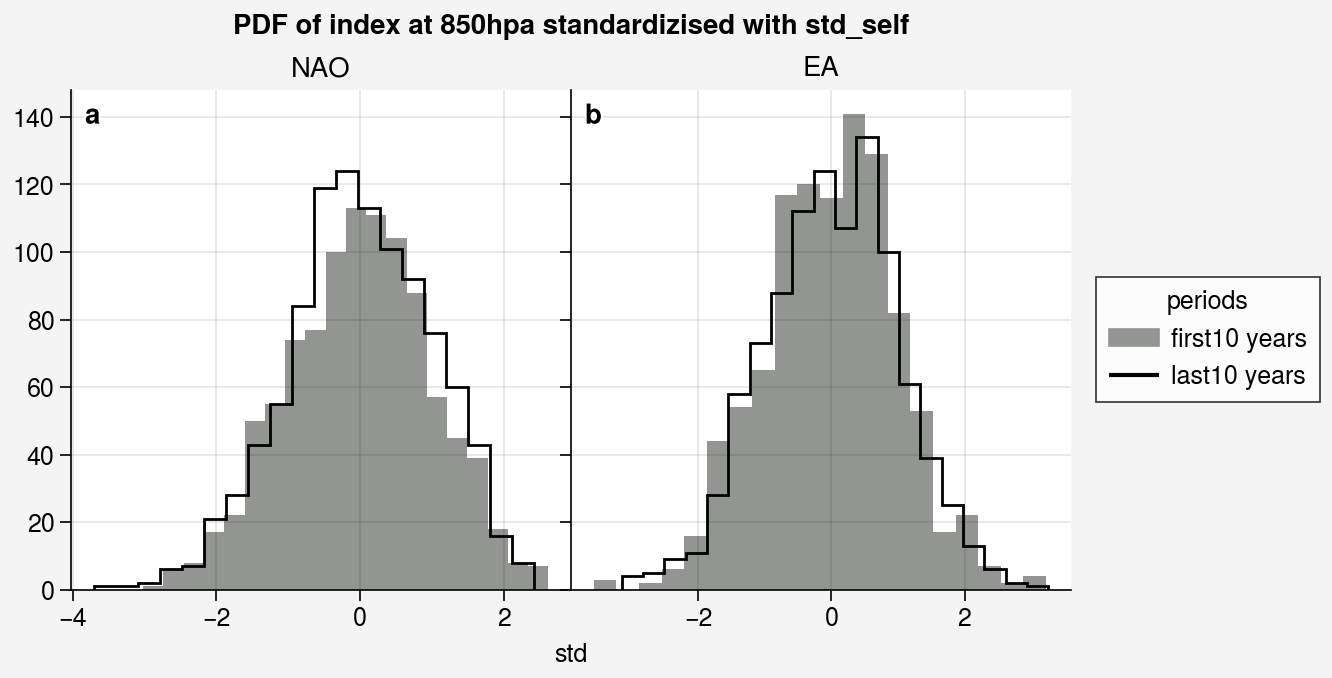

In [10]:
pdf_plots.plot_hist(first10_all_period,last10_all_period,'std_self',hlayers = 85000,bins = 20)

/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(
/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(


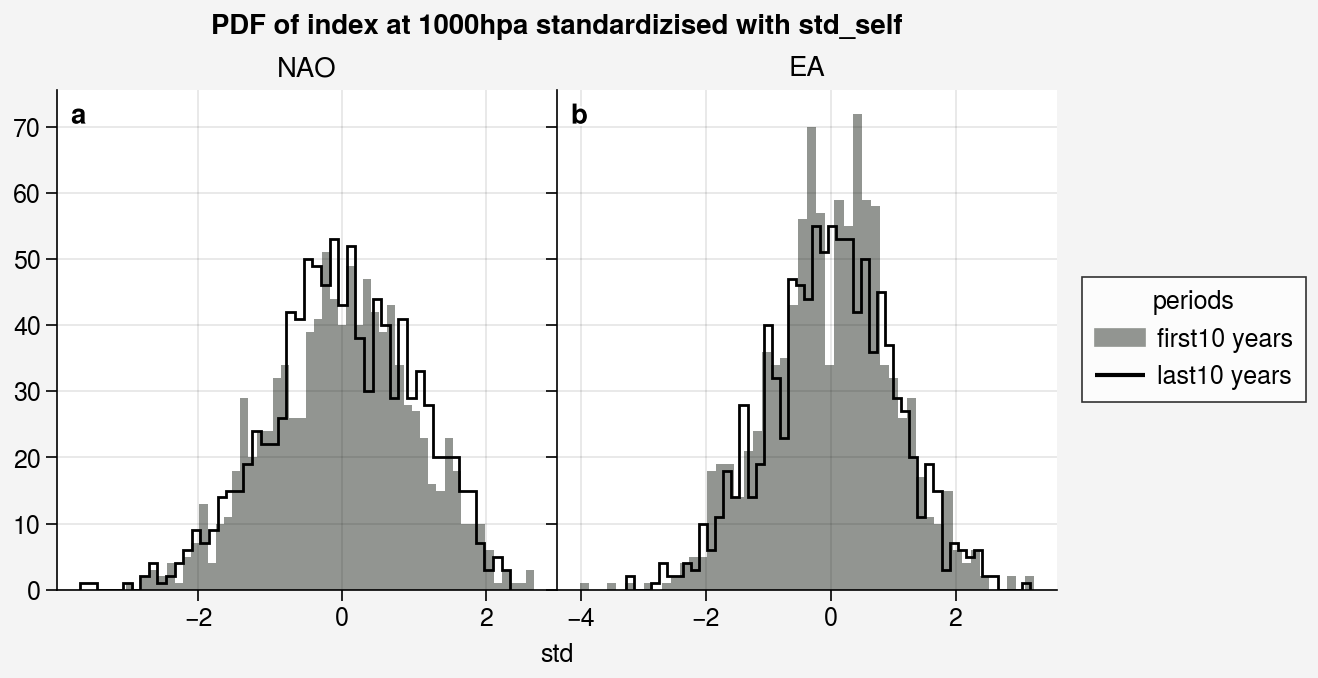

In [11]:
pdf_plots.plot_hist(first10_all_period,last10_all_period,'std_self',hlayers = 100000,bins = 50)


## Extreme count

In [10]:
first10_all_period_ec = extreme.period_extreme_count(first10_all_period)
last10_all_period_ec = extreme.period_extreme_count(last10_all_period)

## Profile

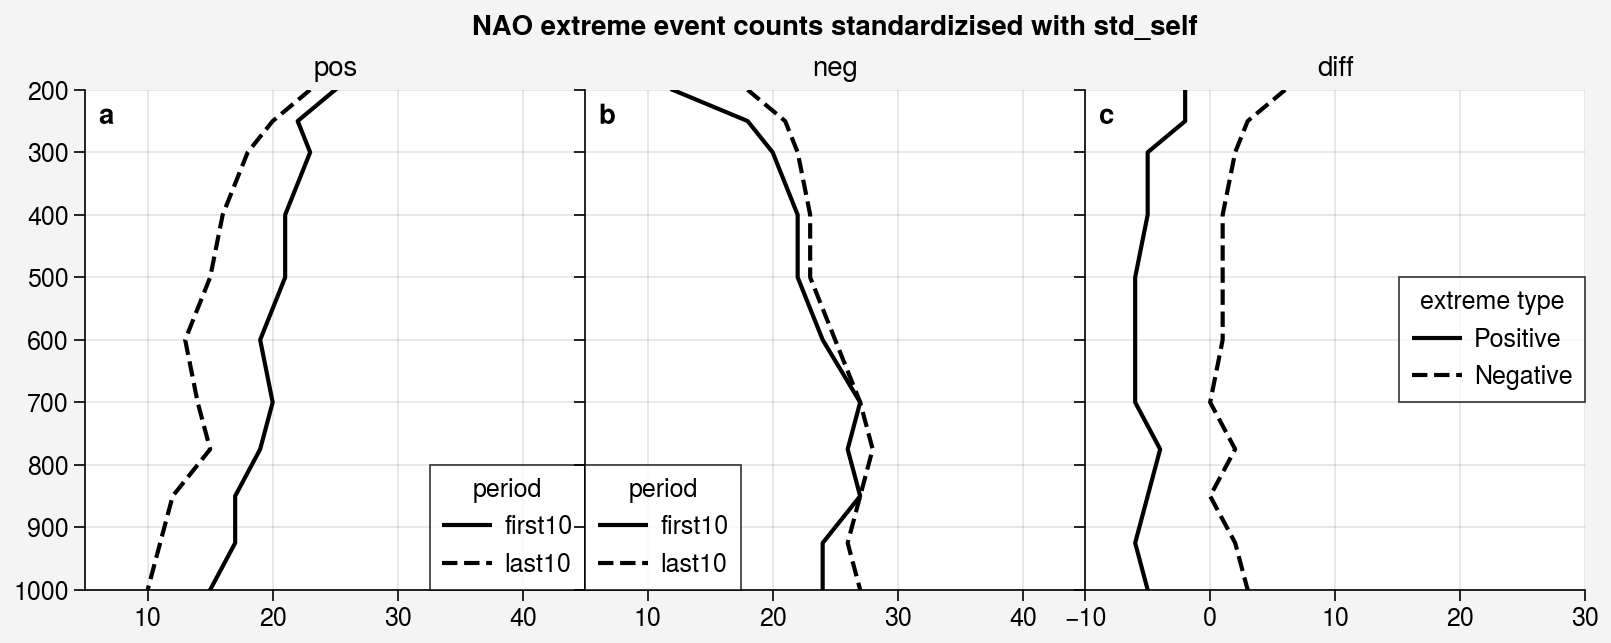

In [13]:
profile_plots.plot_vertical_profile(first10_all_period_ec,last10_all_period_ec,mode = 'NAO',std_type='std_self')

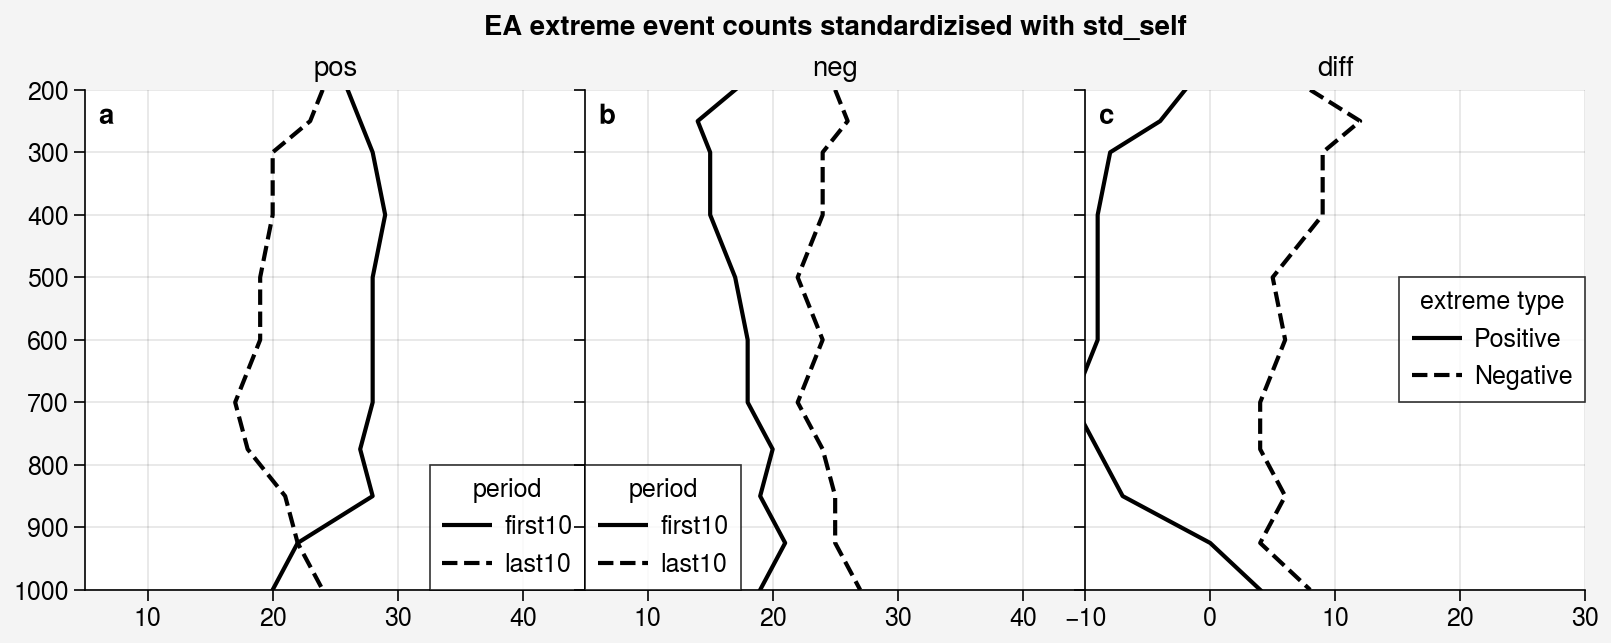

In [14]:
profile_plots.plot_vertical_profile(first10_all_period_ec,last10_all_period_ec,mode = 'EA',std_type='std_self')

# stadnard with *whole* mean and std

In [11]:
all_all_whole = standardize(all_all)

In [12]:
first10_all_whole = all_all_whole.isel(time = slice(0,10))
last10_all_whole = all_all_whole.isel(time = slice(-10,all_all.time.size))

## PDF

/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(
/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(


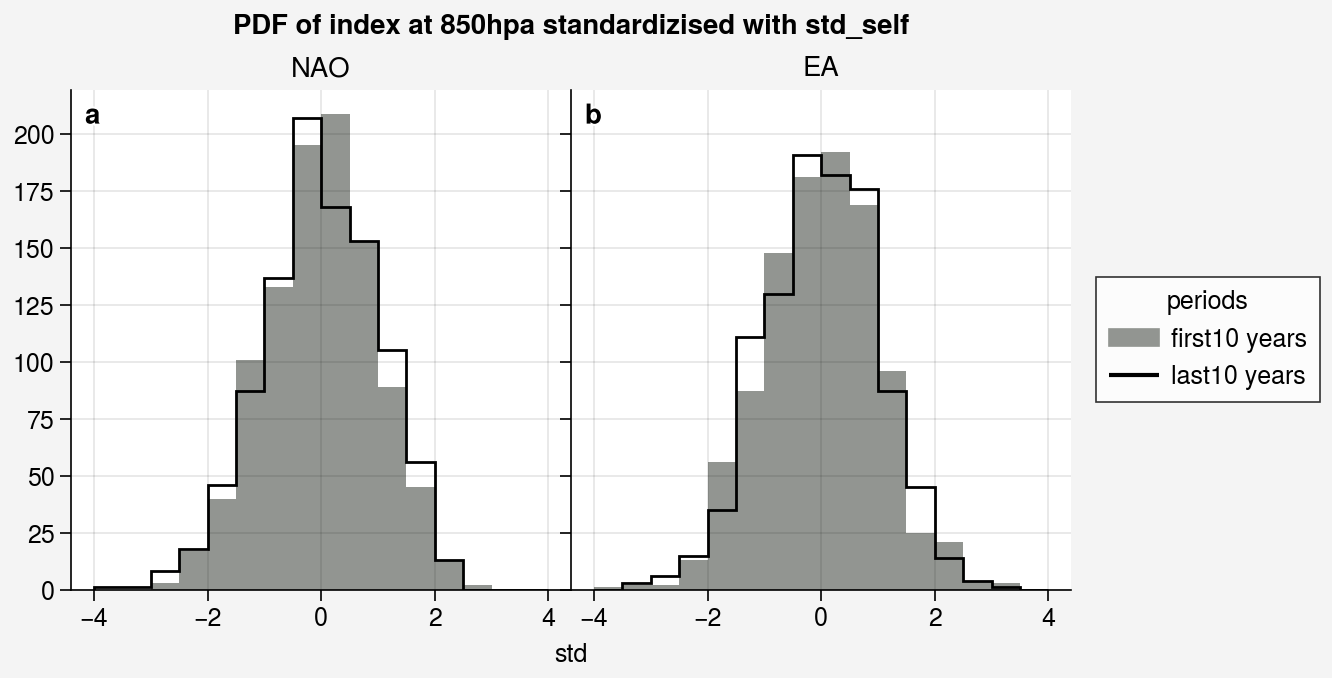

In [17]:
pdf_plots.plot_hist(first10_all_whole,last10_all_whole,'std_self',hlayers = 85000,bins = np.arange(-4,4.1,0.5))

/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(
/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(


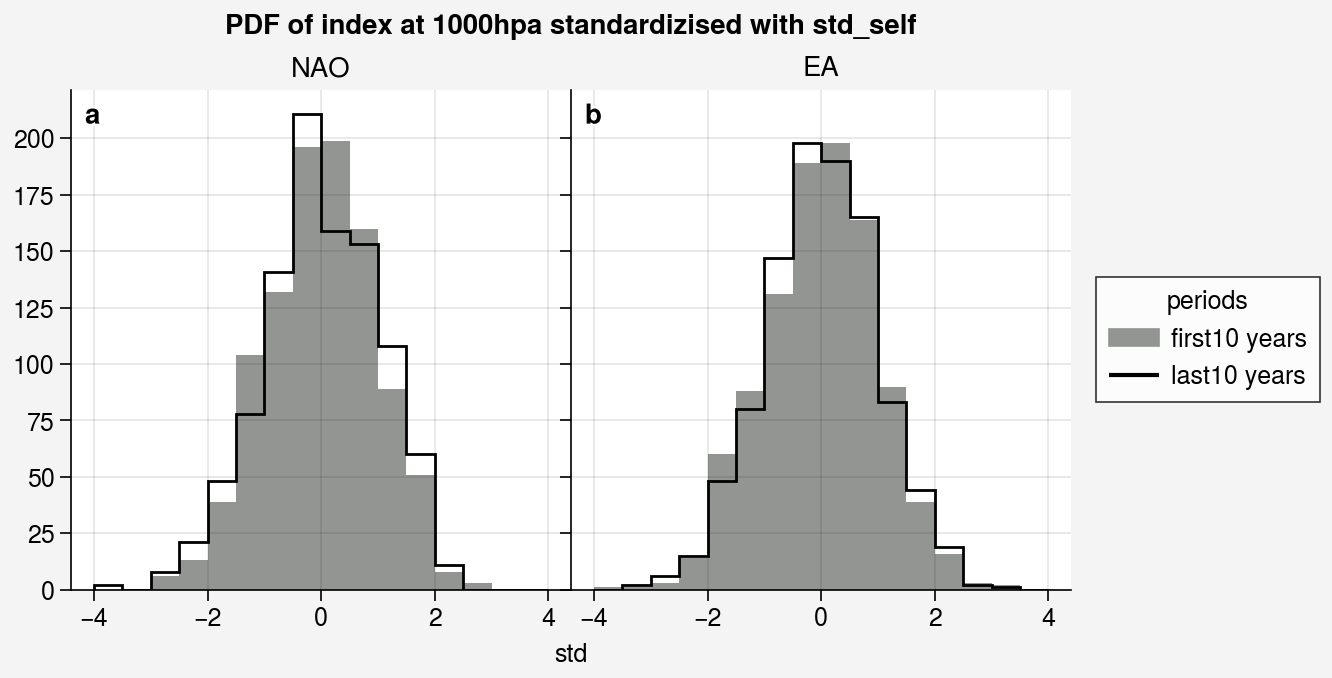

In [18]:
pdf_plots.plot_hist(first10_all_whole,last10_all_whole,'std_self',hlayers = 100000,bins = np.arange(-4,4.1,0.5))


## Extreme count

In [19]:
first10_all_whole_ec = extreme.period_extreme_count(first10_all_whole)
last10_all_whole_ec = extreme.period_extreme_count(last10_all_whole)

## Profile

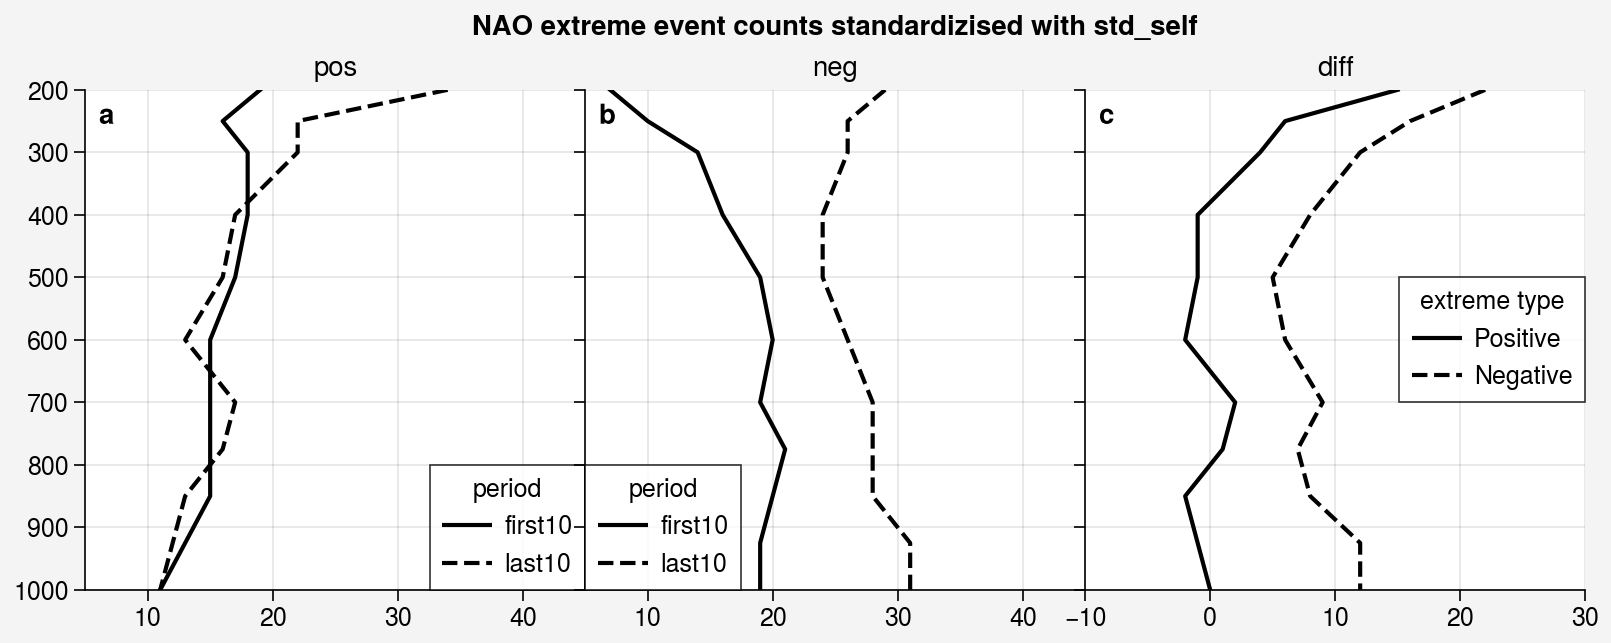

In [20]:
profile_plots.plot_vertical_profile(first10_all_whole_ec,last10_all_whole_ec,mode = 'NAO',std_type='std_self')

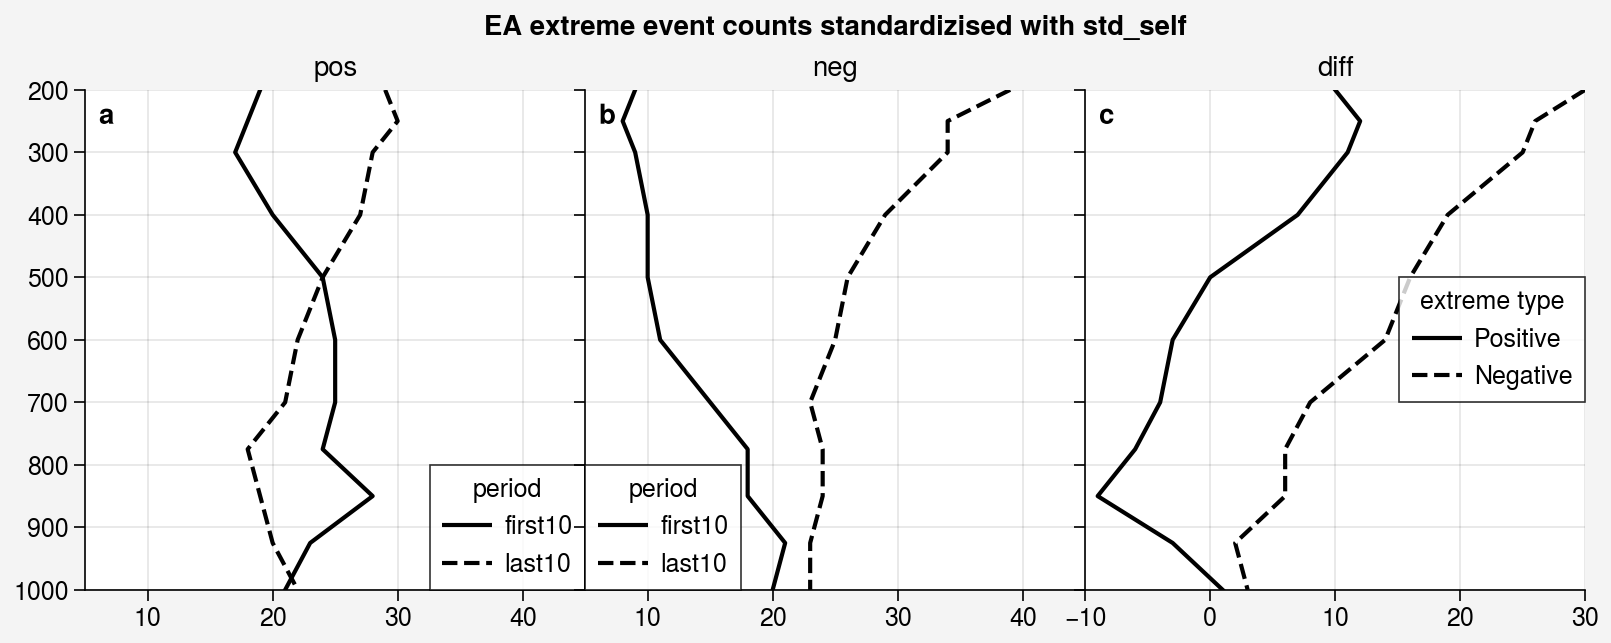

In [21]:
profile_plots.plot_vertical_profile(first10_all_whole_ec,last10_all_whole_ec,mode = 'EA',std_type='std_self')

# box plot

In [17]:
def to_dataframe(period,mode,name):
    period = period.sel(mode = mode).drop('mode')
    period = period.stack(com = ('time','ens'))
    period['com'] = np.arange(period.com.size)
    period = period.to_dataframe(name)
    return period


In [53]:
def xr2df(first10_all_period,last10_all_period,mode):
    first = to_dataframe(first10_all_period, mode = mode,name = mode)
    last = to_dataframe(last10_all_period, mode = mode,name = mode)
    periods = pd.concat([first,last],keys = ['first10','last10'],names = ['period','hlayers','com'])
    periods = periods.reset_index().set_index('com')
    periods['hlayers'] = periods['hlayers']/100
    return periods

In [180]:
def plot_vilion(first, last, std_type,split = False):
    fig = pplt.figure(space = 0, refwidth = "25em")
    axes = fig.subplots(nrows = 1, ncols = 2)
    axes.format(
        abc = 'a',
        abcloc = 'ul',
        xlocator = np.arange(-4,4.1,2),
        xminorlocator = 'null',
        yminorlocator = 'null',
        ylocator = (first.hlayers.values.astype(int))/100,
        suptitle = f"distribution of different periods with standardization of {std_type}"
    )

    modes = ['NAO','EA']

    for i, ax in enumerate(axes):
        df = xr2df(first, last, mode = modes[i])
        g = sns.violinplot(data = df, y= 'hlayers',x = modes[i],
                    hue = 'period',kind="violin", 
                    palette = "pastel",orient='h',ax = ax,
                    split = split, dodge = True, linewidth=1)
        g.axes.legend().remove()
        ax.set_xlim(-5,5)
        ylabel = (first.hlayers.values)/100
        ax.format(title = modes[i],xlabel = 'std',ylabel = 'gph/hpa')

    axes[-1].legend(loc= 'lr', ncols = 1, title = 'period')
    return g


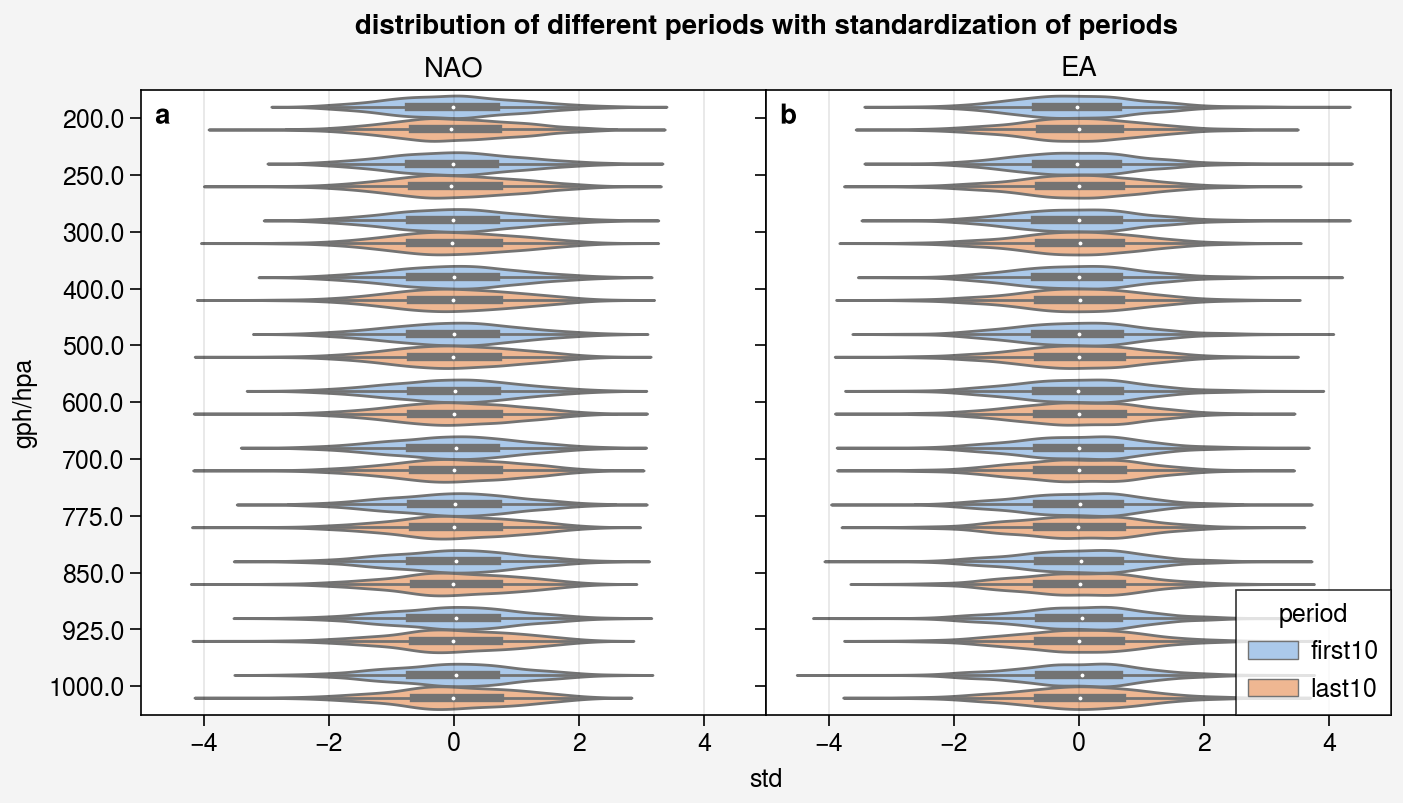

In [181]:
g = plot_vilion(first10_all_period,last10_all_period, std_type = 'periods')

CartesianAxesSubplot(index=(1, 1), number=2)

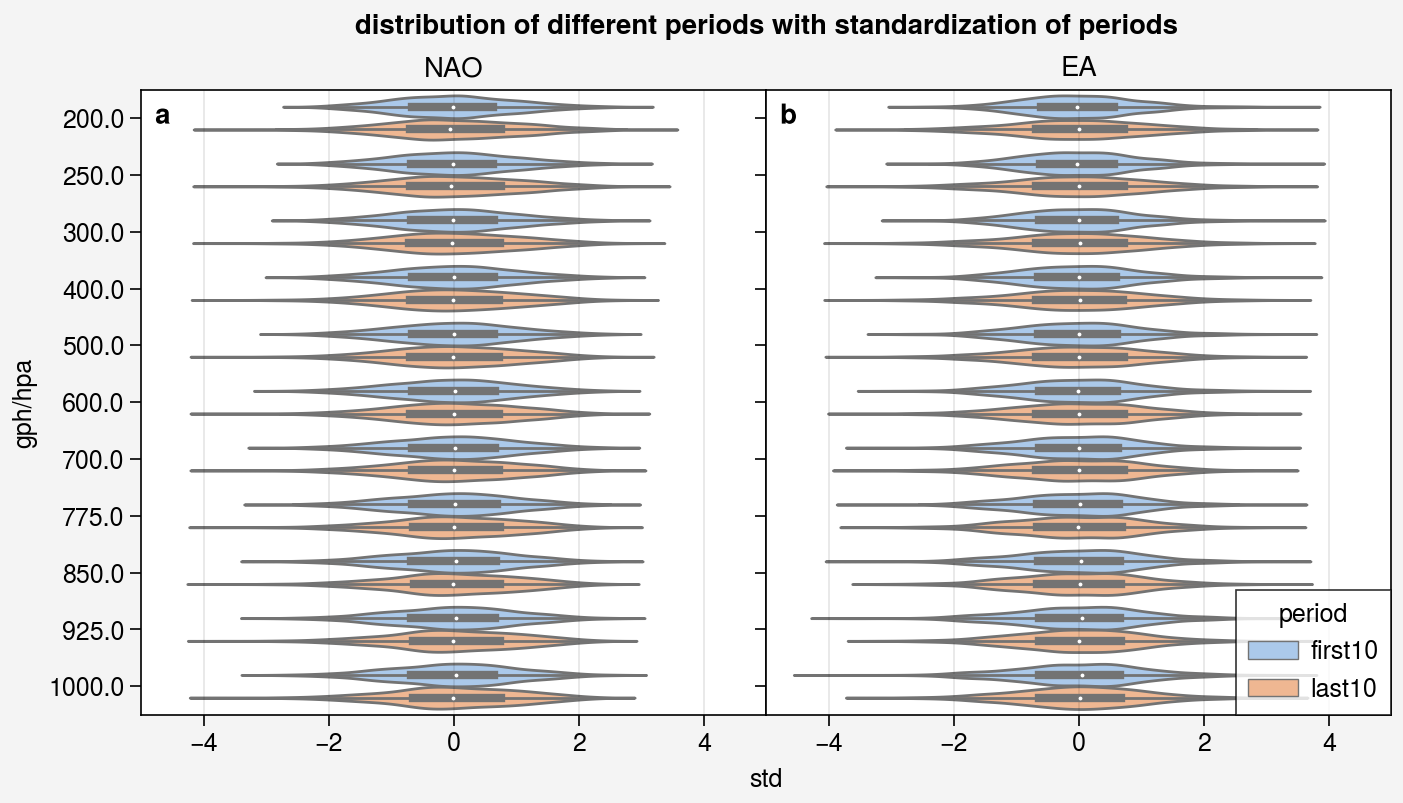

In [166]:
plot_vilion(first10_all_whole,last10_all_whole, std_type = 'periods')